``` py

!pip install takeHomeTest
import takeHomeTest

!pip install time
from time import oneWeek as panic

panic.dump(takeHomeTest)


print("Welcome to your take home final!\n")
```

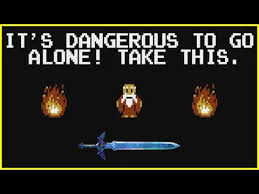




## ------------------------------------------- The Legend of Python --------------------------------------------
**Lore**

In the Kingdom of Pyrovia, all nations once traded in harmony. But since the Shattering of the Global APIs, the knowledge of currency exchange — locked away in XML scrolls — has scattered across the timelines. These scrolls reside in a mysterious repository known only as floatrates.com.

The High Council of Programmers has summoned you (and only you), young code-wielder, to begin your final trial. It is divided into 2 parts.
* Quest 1 (50xp): Retrieving the scrolls of time - Threading and Json save and parsing
* Quest 2 (50xp): Decipher the scrolls - Perform EDA on the data.

------ ------ ------ ------ Extra credit ------ ------ ------ ------ 
* Side Quest 1 (10xp*): Lay down seeds for those that follow - create error logs 
* Side Quest 2 (10xp*): The Quest of reflection  - Use profiling on your code to fully understand it 

*any points over 100% will be rolled over into your final grade. 

I may not have time to run all of your code so make sure you very clearly take notes and communicate successes, issues, and lessons learned. 
Please stay off Chat GPT and stack overflow (and like). You should have most everything you need in the notes. 

--------------------------------------------
# Quest 1 (50 xp): Retrieving the Scrolls of Time 
Retrieve historical exchange rate data from floatrates.com for one of the (Ideally randomly pick) 52 available currencies, starting from the first record on May 4, 2011, until the present day.

- You may store the data as-is in XML, or convert it to JSON, you may use the supplied code below as a starter. 

- Organize each currency into its own directory.

- Ensure your code is modular, maintainable, and robust against timeouts or malformed entries.

## Notes from the Grand Master 
* Threading is your ally. But do not burn out your ally as they have limited resources. You may use the threading or multi-core to parallelize downloads — but mind the server’s load. Around 10 threads is wise. 
    - You should have around 5040 queries.

* XML Scrolls is a new and unfamiliar beast. Therefore takeing on this beast will wield 5 extra experience points. You will not be penalized for choosing to use JSON

*  Use the Save. Nothing is worse than losing experience you have already gained. Save the raw XML (or converted JSON) using timestamped (in my example below) files so you do not need to look it up again. Ie. If you put in a start date and your program has already read that data it should not pull that date again. (it would be a good idea to delete your data and run it top to bottom before final submission)

* Design gracefully. Structure your project with clear modules: downloader.py, parser.py, and so on. 

* Log your quest progress in your quest book to show the Grand Master what you learned this is very important. 


--------------------------------------------

In [1]:
!pip install xmltodict

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
rates = ["EUR", "GBP", "USD", "DZD", "AUD", "BWP", "BND", "CAD", "CLP", "CNY", "COP", "CZK", "DKK", "HUF", "ISK", "INR", "IDR", "ILS", "KZT", "KRW", "KWD", "LYD", "MYR", "MUR", "NPR", "NZD", "NOK", "OMR", "PKR", "PLN", "QAR", "RUB", "SAR", "SGD", "ZAR", "LKR", "SEK", "CHF", "THB", "TTD"]
ratesForBase = [r for r in rates if r != "USD" and r != "EUR" and r != "GBP"]

In [ ]:
import requests
import xmltodict
import json
import random

# URL of the XML data
date = "2011-05-04"
base = random.choice(ratesForBase)
url = f"https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date={date}&base_currency_code={base}&format_type=xml"
print(url)
# Fetch the XML data
response = requests.get(url)
response.raise_for_status()  # Ensure we notice bad responses

# Parse the XML data to a Python dictionary
data_dict = xmltodict.parse(response.text)
with open(f"{date}_exchange_rates_{base}.xml", "w") as json_file:
    json_file.write(response.text)


# Convert the dictionary to a JSON string
json_data = json.dumps(data_dict, indent=4)

# Print the JSON data
print(json_data)

# Optionally, write the JSON data to a file
with open(f"{date}_exchange_rates_{base}.json", "w") as json_file:
    json_file.write(json_data)


https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date=2011-05-04&base_currency_code=['DZD', 'AUD', 'BWP', 'BND', 'CAD', 'CLP', 'CNY', 'COP', 'CZK', 'DKK', 'HUF', 'ISK', 'INR', 'IDR', 'ILS', 'KZT', 'KRW', 'KWD', 'LYD', 'MYR', 'MUR', 'NPR', 'NZD', 'NOK', 'OMR', 'PKR', 'PLN', 'QAR', 'RUB', 'SAR', 'SGD', 'ZAR', 'LKR', 'SEK', 'CHF', 'THB', 'TTD']&format_type=xml


ExpatError: junk after document element: line 2, column 0

In [ ]:
import math as m
import requests
import xmltodict
import json
import xml.etree.ElementTree as ET
import random
from datetime import datetime, timedelta
import threading
import time
import csv
import os

import logging





# https://www.geeksforgeeks.org/xml-parsing-python/
# really good info on parsing xml and saving to csv 

rates = ["EUR", "GBP", "USD", "DZD", "AUD", "BWP", "BND", "CAD", "CLP", "CNY", 
         "COP", "CZK", "DKK", "HUF", "ISK", "INR", "IDR", "ILS", "KZT", "KRW", 
         "KWD", "LYD", "MYR", "MUR", "NPR", "NZD", "NOK", "OMR", "PKR", "PLN", 
         "QAR", "RUB", "SAR", "SGD", "ZAR", "LKR", "SEK", "CHF", "THB", "TTD"]
ratesForBase = [r for r in rates if r != "USD" and r != "EUR" and r != "GBP"]





# URL of the XML data




# WRITE TO FILE WITH DATA

def fetchDataFromXML(respose,date):
    try:
        root =  ET.fromstring(respose)
    except ET.ParseError as e:
        logger.error(f"Error parsing XML string: {e}")
        return []

    newsitems = []

 
    # TODO pass the date the Logger
    logger.info(f'parssing info for {date}')
    # empty news dictionary
    news = {}
    


    for item_element in root.findall('item'):
        item_details = {}

        
        

        # Iterate through all child elements of the current <item>
        for child_element in item_element:
            item_details[child_element.tag] = child_element.text
        if item_details: # Ensure we only add non-empty item data
            item_details['pubDate'] = date
            newsitems.append(item_details)


    print(newsitems)
    return newsitems
  


def savetoCSV(newsitems):

    # specifying the fields for csv file
    fields = ['pubDate','title', 'baseCurrency', 'targetCurrency', 'exchangeRate', 'inverseRate' ]

    # writing to csv file
    if os.path.exists(f"./allDB.csv"):
            with open(f"./allDB.csv", 'a', newline='') as csvfile:
                writer = csv.DictWriter(csvfile, fieldnames = fields,extrasaction='ignore' )
                writer.writerows(newsitems)
    else:
        with open(f"./allDB.csv", 'w') as csvfile:

            # creating a csv dict writer object
            writer = csv.DictWriter(csvfile, fieldnames = fields,extrasaction='ignore' )

            # writing headers (field names)
            writer.writeheader()

            # writing data rows
            writer.writerows(newsitems)


def pullCurrInfo(base,date):

    # make directory

    directories_path = f"currInfo/{base}"
    os.makedirs(directories_path, exist_ok=True)



    url = f"https://www.floatrates.com/historical-exchange-rates.html?operation=rates&pb_id=1775&page=historical&currency_date={date}&base_currency_code={base}&format_type=xml"
    print(url)
    # Fetch the XML data
    response = requests.get(url)
    response.raise_for_status()  # Ensure we notice bad responses

    # Parse the XML data to a Python dictionary
    data_dict = xmltodict.parse(response.text)
    try:
        savetoCSV(fetchDataFromXML(response.text,date))
    except:
        logger.error("ERROR at Saving to CSV")


    # Convert the dictionary to a JSON string
    json_data = json.dumps(data_dict, indent=4)

    # Print the JSON data
    print(json_data) 

    # Optionally, write the JSON data to a file
    with open(f"currInfo//{base}//{date}_exchange_rates_{base}.json", "w") as json_file:
        json_file.write(json_data)

    
    with open(f"currInfo//{base}//{date}_exchange_rates_{base}.xml", "w", encoding="utf-8") as json_file:
        json_file.write(response.text)


def task(name,date):
    threadsPool.acquire()
    try:
        print(f"Thread {name}: starting")
        logger.info(f"{name} at {date} Task Start ")
        pullCurrInfo(name,date)
        print(f"Thread {name}: finishing")
        logger.info(f"{name} at {date} Task Done")
    finally:
        threadsPool.release()




def increment_date_string(startdate, enddate):
    try:
        date_object = datetime.strptime(startdate, "%Y-%m-%d")
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."

    try:
        end_date_object = datetime.strptime(enddate, "%Y-%m-%d")
    except ValueError:
        return "Invalid date format. Please use YYYY-MM-DD."
    
    if date_object > end_date_object:
        return "Start date cannot be after end date."
    
    dates = []
    current_date = date_object
    while current_date <= end_date_object:
        dates.append(current_date.strftime("%Y-%m-%d"))
        current_date += timedelta(days=1)
    
    return dates

    
   
if __name__ == "__main__":
    

    max_threads = 100
    threadsPool = threading.Semaphore(max_threads)

    os.remove("log//kingsLogs.log")
    logger = logging.getLogger("file_logger")
    logger.setLevel(logging.INFO)

    file_handler = logging.FileHandler("log//kingsLogs.log")
    file_handler.setFormatter(logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s'))

    logger.addHandler(file_handler)

    try:
        os.remove("allDb.csv")
    except:
        logger.warning("no DB found")

 
        
    
        

    logger.warning("Starting Threads - GATHERING SCROLLS :)")


    threads = []

    date = "2011-05-04"
    r = random.choice(rates)
    r = "KRW"
    for x in increment_date_string(date, "2025-05-04"):
        thread = threading.Thread(target=task, args=(r,x,))
        threads.append(thread)
        thread.start()


    # for r in ratesForBase:
    #     thread = threading.Thread(target=task, args=(r,))
    #     threads.append(thread)
    #     thread.start()

    # for thread in threads:
    #     thread.join()

    print("All threads completed")
    logger.info("Program Finished - ALL THE SCROLLS ARE BACK")


--------------------------------------------
# Quest 2 (50 XP): Decipher the scrolls – Exploratory Data Analysis

Once the scrolls have been retrieved their knowledge remains unrefined there patterns hidden, trends veiled. Your task now is to become the Seer of Exchange, the one who can read the currencies’ fates through the lens of data.
8
Perform Exploratory Data Analysis (EDA) on the dataset you collected in Quest 1. 
- Aggregate and visualize trends in exchange rate over time for at least 5 major currencies (e.g., USD, EUR, GBP, JPY, CNY).

- Identify periods of volatility — perhaps during economic upheaval

- Generate at least multiple visualizations using seaborn:

- Log your quest progress in your quest book to show the Grand Master what you learned this is very important. some examples of observations are:
    - Anomalies, seasonal patterns, or economic events
    - Currencies with the most/least stability
    - Any interesting correlations between currencies


## Notes from the Grand Master 
- All of your work in this section should be in your jupyter notebook. 

- It might be helpful to use  google to reveal how economic events affected currency. Use Google News or economic calendars to correlate real-world events to exchange rate spikes or dips.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.dates as mdates




# things to remember 
# the data still need to be cleaned 
# - inverserrate and exchangeRate are sometimes in string vs float 
csv_filepath = "./allDBKRW.csv"

try:
    # Load the dataset
    df = pd.read_csv(csv_filepath)
except FileNotFoundError:
    print(f"Error: The file {csv_filepath} was not found.")
    print("Please ensure 'takeHomeTest.py' has been run to generate 'allDB.csv'.")
    return
except pd.errors.EmptyDataError:
    print(f"Error: The file {csv_filepath} is empty.")
    return

print("Columns in the loaded CSV:", df.columns.tolist())

# Filter for KRW as baseCurrency and USD as targetCurrency
# Based on floatrates.com, if base is KRW, target is USD, exchangeRate is how many USD 1 KRW is.
# If you want USD per KRW, this is correct.
# If you want KRW per USD, you might need to use inverseRate or filter differently
# if the source data provides USD as base and KRW as target.
# Assuming 'exchangeRate' for base=KRW, target=USD is what we need (1 KRW = X USD)
df_krw_usd = df[(df['baseCurrency'] == 'KRW') & (df['targetCurrency'] == 'USD')].copy() # Use .copy() to avoid SettingWithCopyWarning

if df_krw_usd.empty:
    print("No data found for KRW to USD. Please check the contents of 'allDB.csv'.")
    print("Ensure 'baseCurrency' is 'KRW' and 'targetCurrency' is 'USD' in your data.")
    return

# Data Cleaning and Preparation
df_krw_usd['pubDate'] = pd.to_datetime(df_krw_usd['pubDate'], errors='coerce')
df_krw_usd['exchangeRate'] = pd.to_numeric(df_krw_usd['exchangeRate'], errors='coerce')
# this bug fix took wayyyy too long
df_krw_usd['inverseRate'] = df_krw_usd['inverseRate'].str.replace(',', '').astype(float)

strngTypes = ["title", "baseCurrency", "targetCurrency"]
for x in strngTypes:

    df_krw_usd[x] = df_krw_usd[x].astype('string')


# drop rows where conversion failed (if any) just in case i miss any
df_krw_usd.dropna(subset=['pubDate', 'exchangeRate'], inplace=True)

if df_krw_usd.empty:
    print("Data became empty after cleaning (date/rate conversion). Please check data quality.")
    return

# Sort data by date
df_krw_usd.sort_values('pubDate', inplace=True)

df_krw_usd.head()
df_krw_usd.info()


Columns in the loaded CSV: ['pubDate', 'title', 'baseCurrency', 'targetCurrency', 'exchangeRate', 'inverseRate']
<class 'pandas.core.frame.DataFrame'>
Index: 5023 entries, 218 to 584291
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   pubDate         5023 non-null   datetime64[ns]
 1   title           5023 non-null   string        
 2   baseCurrency    5023 non-null   string        
 3   targetCurrency  5023 non-null   string        
 4   exchangeRate    5023 non-null   float64       
 5   inverseRate     5023 non-null   float64       
dtypes: datetime64[ns](1), float64(2), string(3)
memory usage: 274.7 KB


C:\Users\gum12\AppData\Local\Temp\ipykernel_34604\1193039118.py:24: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(csv_filepath)


## Cleaned data and now its time to graph them 
yay yay yay yay yay yay yay 

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.dates as mdates


plt.figure(figsize=(10, 6))
plt.scatter(df_krw_usd['pub Date'], df_krw_usd['exchangeRate'], alpha=0.5)
plt.title(f'Correlation between Publication Date and Exchange Rate: {correlation:.2f}')
plt.xlabel('Publication Date')
plt.ylabel('Exchange Rate')
plt.grid(True)
plt.show()

NameError: name 'df_krw_usd' is not defined

<Figure size 1000x600 with 0 Axes>

--------------------------------------------


# Side Quest 1 (10 XP): Lay Down Seeds for Those Who Follow – Logging

Even the greatest explorer must leave breadcrumbs for those who walk the path after them. Here you will construct an error log system, a journal that captures both triumphs and catastrophes.

Implement a robust logging system throughout your codebase to monitor:
- Successful currency downloads
- Parsing attempts and failures
- Skipped downloads (due to saved data or time out)
- Connection errors

## Notes from the Grand Master
- You do not need to do log hierarchy 
- Use log levels: INFO for progress, WARNING for skips, ERROR for failures



--------------------------------------------


# Side Quest 2 (10 XP): The quest of Reflection – Code Profiling

The final challenge for any Adventure is introspection — learning the nature of one's own power. In this side quest, you will profile your code, to discover its bottlenecks, inefficiencies, and optimization opportunities.

Use profiling tools to evaluate:
- Which functions are taking the most time
- How threads/processes are behaving
- Whether I/O is a bottleneck

*A random vendor appears* His invintory shows:
- A Profiler function - cProfile or Profile 
- A time module - timeit for micro-benchmarks
- A line profiler - line_profiler